In [68]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import glob
import statistics as st


import import_ipynb
from initialRankingAlgos import resetWeights
from initialRankingAlgos import addWeights
from initialRankingAlgos import addWeightsSuccessors
from initialRankingAlgos import getWeightsPageRank
from initialRankingAlgos import addWeightsToGraph

from testDataCreation import random_finished_dag
from testDataCreation import cycleMatrix
from testDataCreation import initGraph
from testDataCreation import showWeightDG

In [57]:
def getNodeWeight(DG, i):
    try:
        w = DG.nodes[i]['weight']
    except:
        w = 0
    return w

def rankNodes(DG):
    print(DG.nodes)
    print(DG.nodes.data())
    nodes = list(DG.nodes)
    sorted_nodes = sorted(nodes, key=lambda i: getNodeWeight(DG,i))  
    sorted_nodes.reverse()
    print(sorted_nodes)
    return sorted_nodes

test_data/rand_finished_DAG_N10_E10.txt
[[0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0]]


True

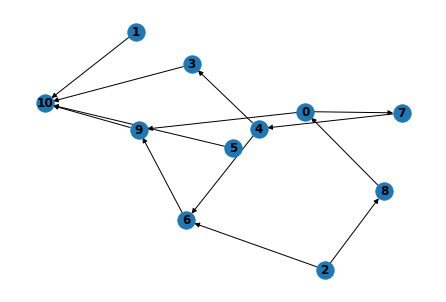

In [75]:
for file_name in glob.iglob('test_data/*E10.txt', recursive=True):
    M = np.loadtxt(file_name, dtype=int)
    print(file_name)
    print(M)
    break

DG = initGraph(M)

nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)

[0.13636364 0.01298701 0.42207792 0.01298701 0.04545455 0.01298701
 0.01948052 0.07792208 0.24025974 0.01298701 0.00649351]
[0, 7, 9, 1, 10, 2, 6, 8, 3, 4, 5]
[(0, {'weight': 0.13636363636363635}), (7, {'weight': 0.07792207792207792}), (9, {'weight': 0.012987012987012988}), (1, {'weight': 0.012987012987012988}), (10, {'weight': 0.006493506493506494}), (2, {'weight': 0.42207792207792205}), (6, {'weight': 0.01948051948051948}), (8, {'weight': 0.24025974025974026}), (3, {'weight': 0.012987012987012988}), (4, {'weight': 0.045454545454545456}), (5, {'weight': 0.012987012987012988})]
[2, 8, 0, 7, 4, 6, 5, 3, 1, 9, 10]


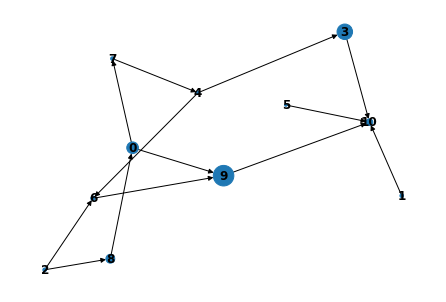

In [76]:
resetWeights(DG)
addWeights(DG)
showWeightDG(DG)
simpleRankData = rankNodes(DG)

[0.16666667 0.02777778 0.22222222 0.02777778 0.11111111 0.02777778
 0.05555556 0.13888889 0.19444444 0.02777778 0.        ]
[0, 7, 9, 1, 10, 2, 6, 8, 3, 4, 5]
[(0, {'weight': 0.16666666666666666}), (7, {'weight': 0.1388888888888889}), (9, {'weight': 0.027777777777777776}), (1, {'weight': 0.027777777777777776}), (10, {'weight': 0.0}), (2, {'weight': 0.2222222222222222}), (6, {'weight': 0.05555555555555555}), (8, {'weight': 0.19444444444444445}), (3, {'weight': 0.027777777777777776}), (4, {'weight': 0.1111111111111111}), (5, {'weight': 0.027777777777777776})]
[2, 8, 0, 7, 4, 6, 5, 3, 1, 9, 10]


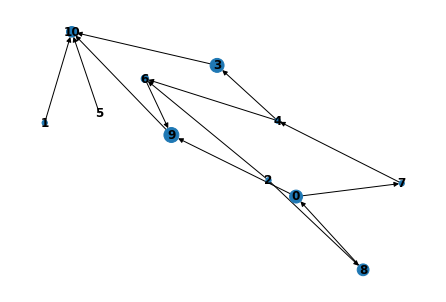

In [77]:
resetWeights(DG)
addWeightsSuccessors(DG)
showWeightDG(DG)
successorsRankData = rankNodes(DG)

{1, 2, 5}
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.33333333]
 [0.         0.         0.         0.         0.5        0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.33333333]
 [0.         0.         0.5        0.         0.5        0.
  0.         0.         0.         0.         0.        ]
 [0.5        0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.5        0.         

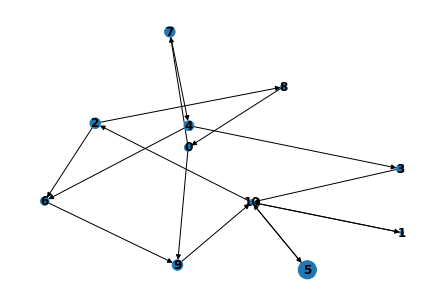

In [78]:
M_cyc = cycleMatrix(DG, M)
DG_cyc = initGraph(M_cyc)
weights = getWeightsPageRank(M_cyc)
addWeightsToGraph(DG_cyc, weights)
showWeightDG(DG_cyc)
pageRankData = rankNodes(DG)

In [79]:
#Show actual ranking

print(simpleRankData)
print(successorsRankData)
print(pageRankData)

[2, 8, 0, 7, 4, 6, 5, 3, 1, 9, 10]
[2, 8, 0, 7, 4, 6, 5, 3, 1, 9, 10]
[2, 8, 0, 7, 4, 6, 5, 3, 1, 9, 10]


In [83]:
#Are those rankings topological sorts?

top_sorts = list(nx.all_topological_sorts(DG))
print(len(top_sorts))
#print(simpleRankData in top_sorts)
#print(successorsRankData in top_sorts)
#print(pageRankData in top_sorts)

def sort_is_topological(DG, sorted_nodes):
    checked_nodes = set()
    for i in range(0, len(sorted_nodes)-1):
        node = sorted_nodes[i]
        checked_nodes.add(node)
        for pred in list(DG.predecessors(node)):
            if not (pred in checked_nodes):
                return False
    return True
        
    
print(sort_is_topological(DG, simpleRankData))
print(sort_is_topological(DG, successorsRankData))
print(sort_is_topological(DG, pageRankData))

270
True
True
True


In [81]:
#How different are the sorts?

def compare_sort_sequences(seq_1, seq_2): #To be updated
    seq_diff = np.array(seq_1) - np.array(seq_2)
    print(seq_diff)
    matched = round((seq_diff == 0).sum() / len(seq_1) * 100, 2)
    return matched
 
print(compare_sort_sequences(pageRankData, successorsRankData))
print(compare_sort_sequences(simpleRankData, successorsRankData))
print(compare_sort_sequences(simpleRankData, pageRankData))

[0 0 0 0 0 0 0 0 0 0 0]
100.0
[0 0 0 0 0 0 0 0 0 0 0]
100.0
[0 0 0 0 0 0 0 0 0 0 0]
100.0
